In [1]:
from json import load
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import transforms
from math import cos, sin, pi
from glob import glob

from skimage import transform, io
from scipy.ndimage import rotate
%matplotlib inline

In [64]:
sorted(glob("*"))
filesets = [
    ['07c2c6e2-3717-4381-96a7-eb5e522dedae.json', '07c2c6e2-3717-4381-96a7-eb5e522dedae.png'],
    ['8beea9d8-2167-4f7d-b140-56bab55bf2aa.json', '8beea9d8-2167-4f7d-b140-56bab55bf2aa.png'],
    ['e68b03ff-4c6a-4c86-b4e9-d41d39160d9b.json', 'e68b03ff-4c6a-4c86-b4e9-d41d39160d9b.png']
]
fileset = 1

In [65]:
meta = load(open(filesets[fileset][0]))

In [66]:
grid = meta['grid']
iscale = meta['scale']

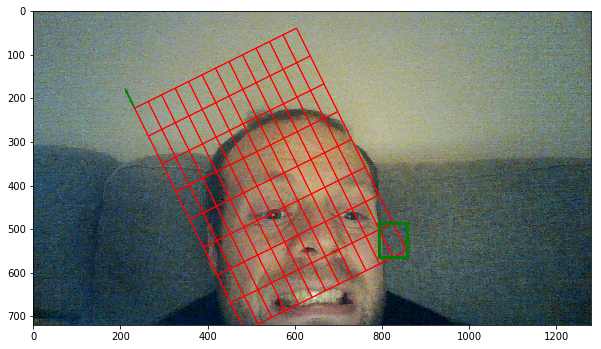

In [67]:
im = plt.imread(filesets[fileset][1])
scale = im.shape[1]/iscale
fig,ax = plt.subplots(1, figsize=(10,20))
ax.imshow(im)
rect = patches.Rectangle((grid['left']*scale,grid['top']*scale),width=grid['width']*grid['scaleX']*scale,height=grid['height']*grid['scaleY']*scale,angle=grid['angle'],linewidth=1,edgecolor='r',facecolor='none')
ar_pa = patches.Arrow(grid['left']*scale, grid['top']*scale, cos(((grid['angle']-90)/360)*(2*pi))*50, sin(((grid['angle']-90)/360)*(2*pi))*50, color = 'green', width=10)
ax.add_patch(ar_pa)
ax.add_patch(rect)

grid_size = max(grid['width']/12, grid['height']/12)*scale
width=grid_size*grid['scaleX']
height=grid_size*grid['scaleY']
ori_x = grid['left']*scale
ori_y = grid['top']*scale
angle = (grid['angle']/360)*2*pi

for row in range(8):
    for col in range(12):        
        dx = ori_x+width*col*cos(angle)-height*row*sin(angle)
        dy = ori_y+width*col*sin(angle)+height*row*cos(angle)
        mrect = patches.Rectangle((dx, dy), width=width, height=height, angle=grid['angle'],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(mrect)

#bb = mrect.get_patch_transform().transform(mrect.get_path().vertices[:-1])
#bb_x_min = coo[:,0].min()
#bb_x_max = coo[:,0].max()
#bb_y_min = coo[:,1].min()
#bb_y_max = coo[:,1].max()
dx1 = ori_x+width*col*cos(angle)-height*row*sin(angle)
dx2 = ori_x+width*(col)*cos(angle)-height*(row+1)*sin(angle)
dx3 = ori_x+width*(col+1)*cos(angle)-height*(row+1)*sin(angle)
dx4 = ori_x+width*(col+1)*cos(angle)-height*row*sin(angle)
dxs = [dx1,dx2,dx3,dx4]
dy1 = ori_y+width*col*sin(angle)+height*row*cos(angle)
dy2 = ori_y+width*col*sin(angle)+height*(row+1)*cos(angle)
dy3 = ori_y+width*(col+1)*sin(angle)+height*(row+1)*cos(angle)
dy4 = ori_y+width*(col+1)*sin(angle)+height*row*cos(angle)
dys = [dy1,dy2,dy3,dy4]

bb_rect = patches.Rectangle((min(dxs), min(dys)), width=max(dxs)-min(dxs), height=max(dys)-min(dys), linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(bb_rect)
plt.show()